<a href="https://colab.research.google.com/github/componavt/python-ai-template/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем GitHub-репозиторий курса в Google Colab
- Загружаем CSV-файл `cartoons_genre_country_duration.csv` (8011 записей о 2273 фильмах)
- Очищаем столбцы: удаляем URL Wikidata, переименовываем `*Label` → короткие имена
- Приводим числовые поля (`capital_cost`, `duration`) к типу `int`

**Результат:** Чистая таблица `df` с полями:
- `film` — название мультфильма
- `genre` — жанр
- `country` — страна производства
- `duration` — продолжительность (минуты)
- `capital_cost` — бюджет ($)

In [2]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий
if not os.path.exists("python-ai-template"):
    !git clone -q https://github.com/componavt/python-ai-template.git

%cd python-ai-template
print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем CSV-файл
df = pd.read_csv("data/examples/cartoons_genre_country_duration.csv")
print(f"📊 Загружено строк: {len(df)}")

# Шаг 3: Очистка данных
# Удаляем URL Wikidata (столбец 'film')
df = df.drop(columns=["film"])

# Переименовываем столбцы с Label → короткие имена
df = df.rename(columns={
    "filmLabel": "film",
    "genreLabel": "genre",
    "countryLabel": "country",
})

# Приводим числовые столбцы к int (заменяем пропуски на 0)
df["duration"] = pd.to_numeric(df["duration"], errors="coerce").fillna(0).astype(int)
df["capital_cost"] = pd.to_numeric(df["capital_cost"], errors="coerce").fillna(0).astype(int)

print("✅ Данные очищены и готовы к анализу\n")

# Краткий обзор
print("📋 Структура данных:")
print(f"  Столбцы: {', '.join(df.columns)}")
print(f"  Уникальных фильмов: {df['film'].nunique()}")
print(f"  Уникальных стран: {df['country'].nunique()}")
print(f"  Уникальных жанров: {df['genre'].nunique()}")
print(f"\n🔍 Первые 3 строки:\n{df.head(3)}")

/content/python-ai-template
✅ Репозиторий готов

📊 Загружено строк: 2596
✅ Данные очищены и готовы к анализу

📋 Структура данных:
  Столбцы: film, genre, country, duration, capital_cost
  Уникальных фильмов: 418
  Уникальных стран: 40
  Уникальных жанров: 125

🔍 Первые 3 строки:
                        film                                   genre  \
0                Мэри и Макс                       взрослая анимация   
1  Отважный маленький тостер  экранизация литературного произведения   
2                  Ренессанс                               киберпанк   

      country  duration  capital_cost  
0   Австралия        90       8240000  
1         США        90       2300000  
2  Люксембург       101      18000000  


## 📊 [1] Bar Chart: Top 10 Countries by Production Volume

**Что показывает:**  
Какие страны лидируют в производстве мультфильмов. США доминируют (~35% всех фильмов), за ними Франция, СССР, Дания и Россия.

**Когда использовать:**  
Для сравнения категорий (стран, компаний, продуктов) по одному числовому показателю.

**Библиотеки:** `matplotlib`

**Метод pandas:** `value_counts()` — подсчитывает, сколько раз каждое значение встречается в столбце.

/tmp/ipython-input-488871758.py:23: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


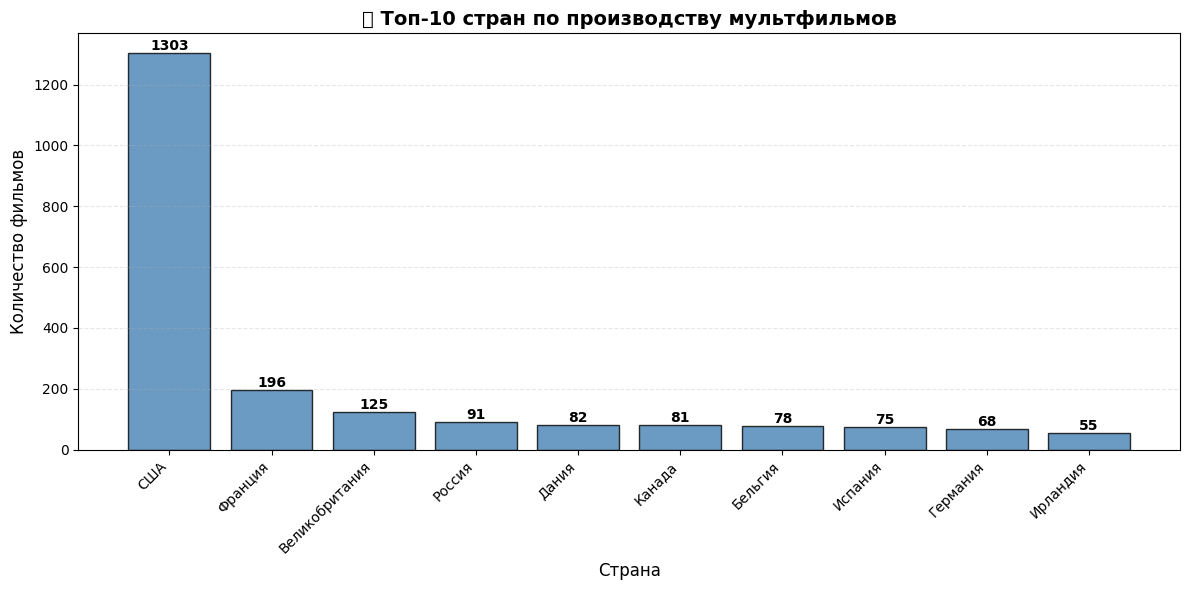

💡 Инсайт: США производят 50.2% всех мультфильмов в датасете!
   Топ-3: США, Франция, Великобритания


In [3]:
# 📊 [1] Bar Chart: Top 10 Countries

# 1. Подготовка данных: считаем количество фильмов по странам
top_countries = df['country'].value_counts().head(10)

# 2. Создаём график
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='steelblue', edgecolor='black', alpha=0.8)

# 3. Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Оформление
plt.title('🌍 Топ-10 стран по производству мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
usa_share = (top_countries['США'] / len(df) * 100)
print(f"💡 Инсайт: США производят {usa_share:.1f}% всех мультфильмов в датасете!")
print(f"   Топ-3: {', '.join(top_countries.head(3).index)}")

## 📊 [2] Horizontal Bar Chart: Top 15 Genres

**Что показывает:**  
Самые популярные жанры в мультипликации. Лидируют приключенческие, комедийные и фэнтезийные фильмы.

**Когда использовать:**  
Когда у категорий длинные названия — горизонтальный график читается лучше, чем вертикальный с повёрнутыми подписями.

**Библиотеки:** `matplotlib`

**Метод:** `plt.barh()` — horizontal bar chart (горизонтальная столбчатая диаграмма).

/tmp/ipython-input-816486237.py:20: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


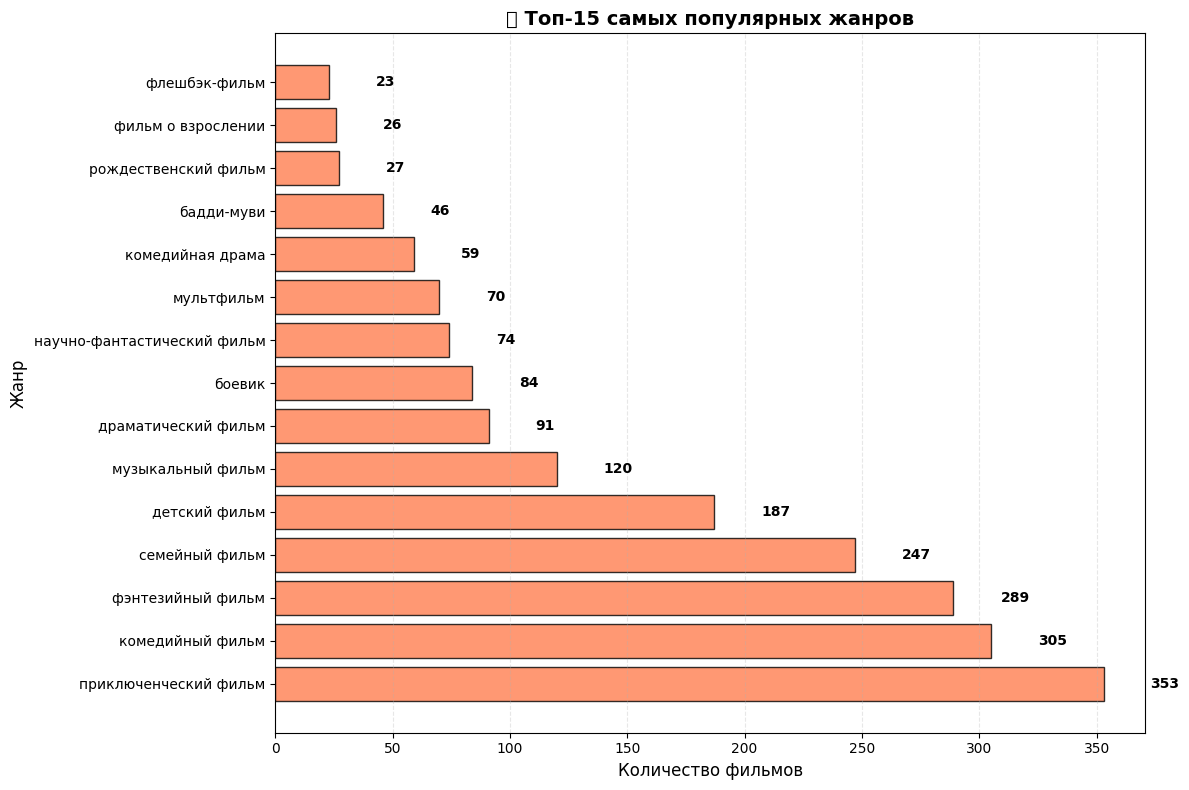

💡 Инсайт: Приключенческие фильмы (353) встречаются в 15.3 раз чаще, чем флешбэк-фильм (23)


In [4]:
# 📊 [2] Horizontal Bar Chart: Top 15 Genres

# 1. Подготовка данных
top_genres = df['genre'].value_counts().head(15)

# 2. Создаём график
plt.figure(figsize=(12, 8))
bars = plt.barh(top_genres.index, top_genres.values, color='coral', edgecolor='black', alpha=0.8)

# 3. Добавляем значения справа от столбцов
for i, (genre, count) in enumerate(top_genres.items()):
    plt.text(count + 20, i, f'{count}',
             va='center', fontsize=10, fontweight='bold')

# 4. Оформление
plt.title('🎬 Топ-15 самых популярных жанров', fontsize=14, fontweight='bold')
plt.xlabel('Количество фильмов', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
print(f"💡 Инсайт: Приключенческие фильмы ({top_genres.iloc[0]}) встречаются в {top_genres.iloc[0]/top_genres.iloc[-1]:.1f} раз чаще, чем {top_genres.index[-1]} ({top_genres.iloc[-1]})")

## 📊 [3] Pie Chart: Top 5 Countries Market Share

**Что показывает:**  
Долю топ-5 стран в мировом производстве мультфильмов. Наглядно видно доминирование США.

**Когда использовать:**  
Для визуализации долей от целого (но не более 5-7 категорий, иначе неудобно читать).

**Библиотеки:** `matplotlib`

**Совет:** Используйте `startangle=90` для красивого расположения первого сектора сверху.

/tmp/ipython-input-586119671.py:30: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


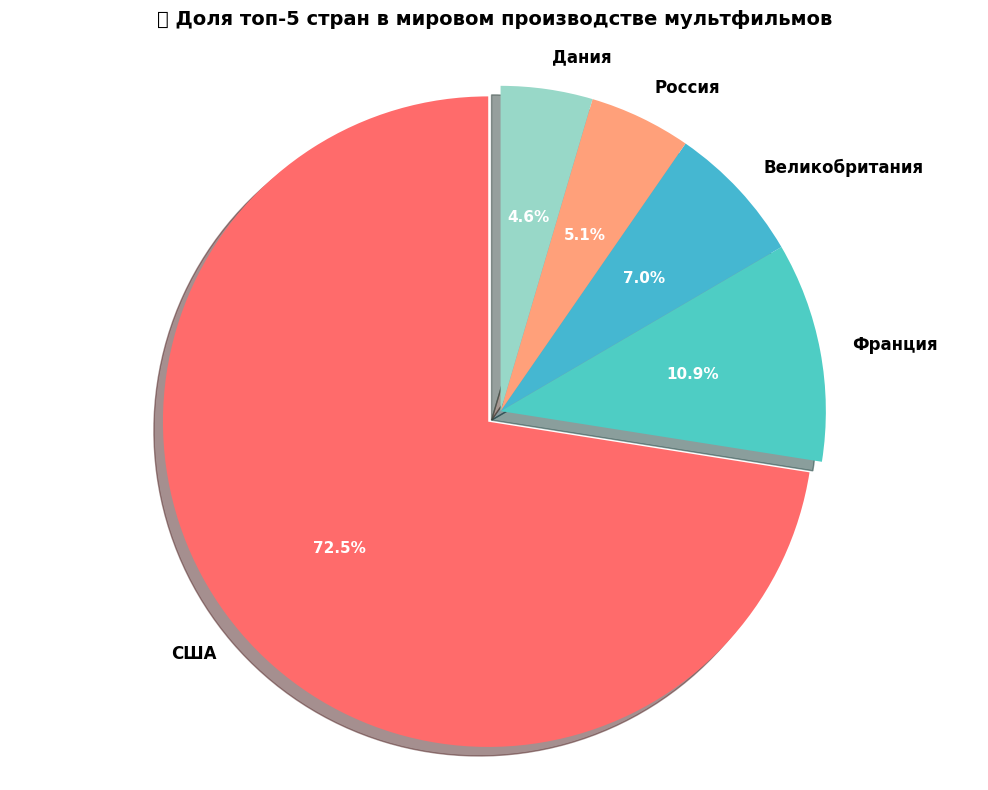

💡 Инсайт: США — 50.2%, остальные 81 страна — всего 30.8%


In [5]:
# 📊 [3] Pie Chart: Top 5 Countries Market Share

# 1. Подготовка данных
top5_countries = df['country'].value_counts().head(5)

# 2. Создаём график
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = plt.pie(
    top5_countries.values,
    labels=top5_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0, 0, 0, 0),  # "выдвигаем" самый большой сектор
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 3. Делаем проценты жирными и белыми
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# 4. Оформление
plt.title('🥧 Доля топ-5 стран в мировом производстве мультфильмов',
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')  # Круг, а не овал
plt.tight_layout()
plt.show()

# 5. Инсайт
usa_pct = top5_countries['США'] / len(df) * 100
others_pct = (len(df) - top5_countries.sum()) / len(df) * 100
print(f"💡 Инсайт: США — {usa_pct:.1f}%, остальные 81 страна — всего {others_pct:.1f}%")

## 📊 [4] Histogram: Budget Distribution

**Что показывает:**  
Распределение бюджетов мультфильмов. Большинство фильмов имеют бюджет до $100 млн, но есть выбросы (до $2.8 млрд!).

**Когда использовать:**  
Для анализа распределения одной числовой переменной (бюджет, возраст, зарплата).

**Библиотеки:** `matplotlib`

**Параметр bins:** Количество "корзин" для группировки значений (30 bins = 30 столбцов).

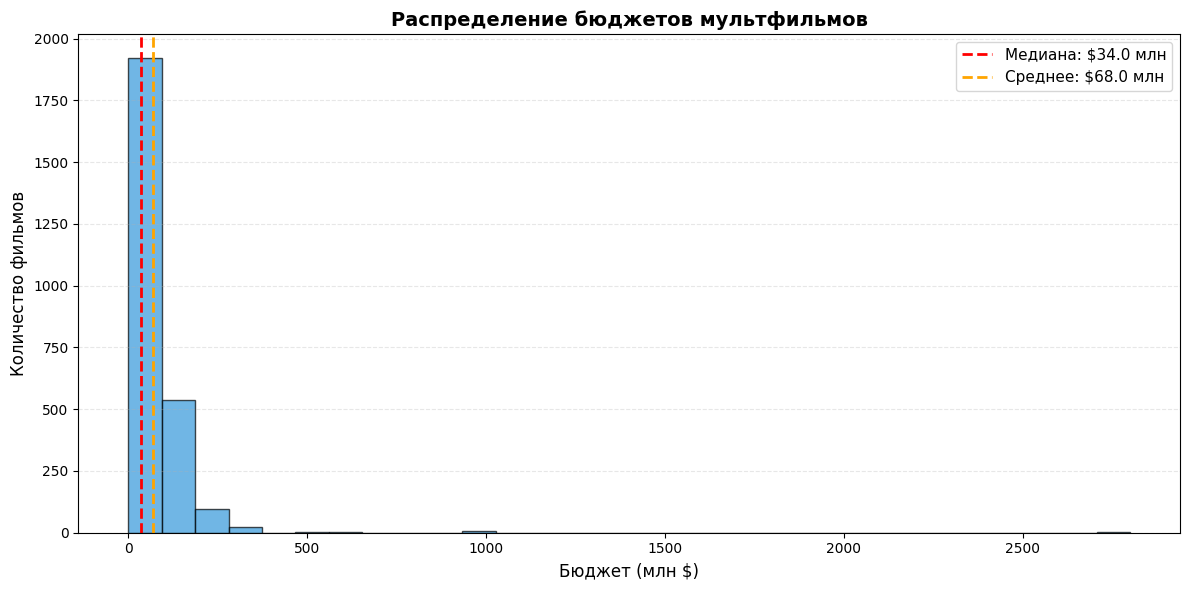

💡 Инсайт: 50% фильмов имеют бюджет до $34.0 млн (медиана)
   Самый дорогой: $2800 млн
   Фильмов с бюджетом >$100 млн: 526


In [6]:
# 📊 [4] Histogram: Budget Distribution

# 1. Подготовка данных: фильтруем нулевые бюджеты и переводим в млн $
df_with_budget = df[df['capital_cost'] > 0].copy()
budgets_millions = df_with_budget['capital_cost'] / 1e6

# 2. Создаём график
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(
    budgets_millions,
    bins=30,
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 3. Добавляем вертикальные линии для медианы и среднего
median_budget = budgets_millions.median()
mean_budget = budgets_millions.mean()

plt.axvline(median_budget, color='red', linestyle='--', linewidth=2,
            label=f'Медиана: ${median_budget:.1f} млн')
plt.axvline(mean_budget, color='orange', linestyle='--', linewidth=2,
            label=f'Среднее: ${mean_budget:.1f} млн')

# 4. Оформление
plt.title('Распределение бюджетов мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Бюджет (млн $)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
print(f"💡 Инсайт: 50% фильмов имеют бюджет до ${median_budget:.1f} млн (медиана)")
print(f"   Самый дорогой: ${budgets_millions.max():.0f} млн")
print(f"   Фильмов с бюджетом >$100 млн: {(budgets_millions > 100).sum()}")

## 📊 [5] Histogram: Duration Distribution

**Что показывает:**  
Распределение продолжительности мультфильмов. Пик приходится на 80-90 минут — стандарт полнометражного фильма.

**Когда использовать:**  
Для визуализации распределения времени, возраста, расстояний и других непрерывных величин.

**Библиотеки:** `matplotlib`

**Совет:** Используйте вертикальную линию (`axvline`) для обозначения важных значений (например, 90 минут = стандарт).

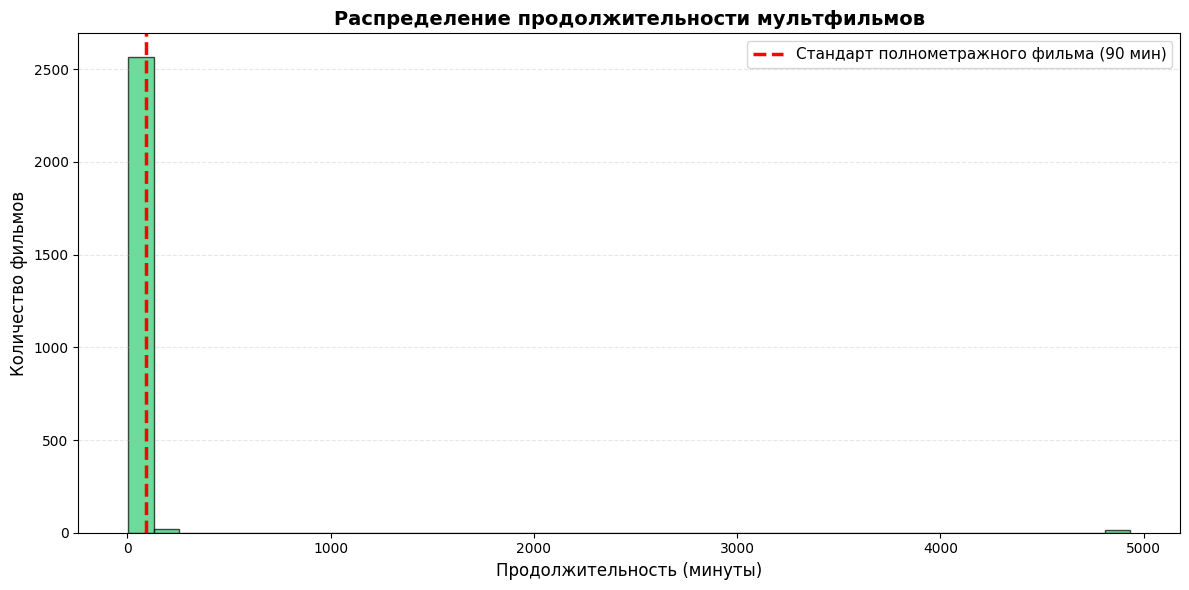

💡 Инсайт: Медианная продолжительность — 88 минут
   Полнометражных фильмов (≥75 мин): 2406 (92.7%)
   Короткометражных (<45 мин): 8 (0.3%)


In [7]:
# 📊 [5] Histogram: Duration Distribution

# 1. Подготовка данных: фильтруем нулевые значения
df_with_duration = df[df['duration'] > 0].copy()

# 2. Создаём график
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(
    df_with_duration['duration'],
    bins=40,
    color='#2ecc71',
    edgecolor='black',
    alpha=0.7
)

# 3. Добавляем вертикальную линию на 90 минут (стандарт полнометражки)
plt.axvline(90, color='red', linestyle='--', linewidth=2.5,
            label='Стандарт полнометражного фильма (90 мин)')

# 4. Оформление
plt.title('Распределение продолжительности мультфильмов', fontsize=14, fontweight='bold')
plt.xlabel('Продолжительность (минуты)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
median_duration = df_with_duration['duration'].median()
feature_films = (df_with_duration['duration'] >= 75).sum()
short_films = (df_with_duration['duration'] < 45).sum()

print(f"💡 Инсайт: Медианная продолжительность — {median_duration:.0f} минут")
print(f"   Полнометражных фильмов (≥75 мин): {feature_films} ({feature_films/len(df_with_duration)*100:.1f}%)")
print(f"   Короткометражных (<45 мин): {short_films} ({short_films/len(df_with_duration)*100:.1f}%)")

🗺️ Промпт 2: Географические карты (если есть страны или координаты)

🗺️ Визуализация 1: Интерактивная Choropleth Map (Plotly) — Карта мира по количеству мультфильмов

In [8]:
# 🗺️ Географическая визуализация 1: Choropleth Map
# Интерактивная карта мира с цветовой кодировкой по количеству мультфильмов

import plotly.express as px
import pandas as pd

# 1. Подготовка данных: маппинг русских названий → ISO коды стран
country_mapping = {
    'США': 'USA', 'Франция': 'FRA', 'СССР': 'RUS', 'Дания': 'DNK',
    'Россия': 'RUS', 'Япония': 'JPN', 'Великобритания': 'GBR',
    'Канада': 'CAN', 'Германия': 'DEU', 'Нидерланды': 'NLD',
    'Италия': 'ITA', 'Испания': 'ESP', 'Бельгия': 'BEL',
    'Чехословакия': 'CZE', 'Швеция': 'SWE', 'Китай': 'CHN',
    'Польша': 'POL', 'Ирландия': 'IRL', 'Австралия': 'AUS',
    'Южная Корея': 'KOR', 'Норвегия': 'NOR', 'Финляндия': 'FIN',
    'Австрия': 'AUT', 'Швейцария': 'CHE', 'Израиль': 'ISR',
    'Венгрия': 'HUN', 'Республика Корея': 'KOR', 'Аргентина': 'ARG',
    'Мексика': 'MEX', 'Люксембург': 'LUX', 'Румыния': 'ROU',
    'Новая Зеландия': 'NZL', 'Бразилия': 'BRA', 'Индия': 'IND',
    'Португалия': 'PRT', 'Греция': 'GRC', 'Болгария': 'BGR',
    'Турция': 'TUR', 'ЮАР': 'ZAF', 'Чили': 'CHL'
}

# 2. Подсчет мультфильмов по странам
country_stats = df['country'].value_counts().reset_index()
country_stats.columns = ['country', 'film_count']

# 3. Добавляем ISO коды
country_stats['iso_alpha'] = country_stats['country'].map(country_mapping)

# 4. Добавляем средний бюджет (для hover)
budget_avg = df.groupby('country')['capital_cost'].apply(
    lambda x: x[x > 0].mean() if (x > 0).any() else 0
).reset_index()
budget_avg.columns = ['country', 'avg_budget']
country_stats = country_stats.merge(budget_avg, on='country', how='left')

# 5. Удаляем страны без ISO кодов
country_stats_clean = country_stats.dropna(subset=['iso_alpha'])

# 6. Создаём интерактивную карту
fig = px.choropleth(
    country_stats_clean,
    locations="iso_alpha",
    color="film_count",
    hover_name="country",
    hover_data={
        'film_count': ':,',
        'avg_budget': ':,.0f',
        'iso_alpha': False
    },
    color_continuous_scale="YlOrRd",
    labels={'film_count': 'Количество фильмов', 'avg_budget': 'Средний бюджет ($)'},
    title="🌍 География анимационной индустрии: Производство мультфильмов по странам"
)

# 7. Оформление
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    font=dict(size=14)
)

fig.show()

# 8. Инсайт
top3 = country_stats_clean.nlargest(3, 'film_count')
print("\n💡 Географический инсайт:")
print(f"🥇 Лидер: {top3.iloc[0]['country']} — {top3.iloc[0]['film_count']} фильмов")
print(f"🥈 2-е место: {top3.iloc[1]['country']} — {top3.iloc[1]['film_count']} фильмов")
print(f"🥉 3-е место: {top3.iloc[2]['country']} — {top3.iloc[2]['film_count']} фильмов")
print(f"\n🌍 Всего стран-производителей: {len(country_stats_clean)}")


💡 Географический инсайт:
🥇 Лидер: США — 1303 фильмов
🥈 2-е место: Франция — 196 фильмов
🥉 3-е место: Великобритания — 125 фильмов

🌍 Всего стран-производителей: 30


Инсайт: Карта показывает глобальное доминирование США и Европы (Франция, Дания) в анимационной индустрии.


🌐 Визуализация 2: Scatter Geo Map (Plotly) — Пузырьковая карта с размером точек

In [9]:
# 🌐 Географическая визуализация 2: Scatter Geo Map
# Точки на карте с размером пропорциональным количеству фильмов

import plotly.graph_objects as go

# 1. Координаты столиц для визуализации (примерные центры стран)
country_coords = {
    'США': (37.09, -95.71), 'Франция': (46.23, 2.21), 'СССР': (55.75, 37.62),
    'Дания': (56.26, 9.50), 'Россия': (55.75, 37.62), 'Япония': (36.20, 138.25),
    'Великобритания': (55.38, -3.44), 'Канада': (56.13, -106.35),
    'Германия': (51.17, 10.45), 'Нидерланды': (52.13, 5.29),
    'Италия': (41.87, 12.57), 'Испания': (40.46, -3.75),
    'Бельгия': (50.50, 4.47), 'Чехословакия': (49.82, 15.47),
    'Швеция': (60.13, 18.64), 'Китай': (35.86, 104.20),
    'Польша': (51.92, 19.15), 'Ирландия': (53.41, -8.24),
    'Австралия': (-25.27, 133.78), 'Южная Корея': (35.91, 127.77),
    'Норвегия': (60.47, 8.47), 'Финляндия': (61.92, 25.75),
    'Австрия': (47.52, 14.55), 'Швейцария': (46.82, 8.23),
    'Израиль': (31.05, 34.85), 'Венгрия': (47.16, 19.50),
    'Республика Корея': (35.91, 127.77), 'Аргентина': (-38.42, -63.62),
    'Мексика': (23.63, -102.55), 'Люксембург': (49.82, 6.13),
    'Румыния': (45.94, 24.97), 'Новая Зеландия': (-40.90, 174.89),
    'Бразилия': (-14.24, -51.93), 'Индия': (20.59, 78.96),
    'Португалия': (39.40, -8.22), 'Греция': (39.07, 21.82),
    'Болгария': (42.73, 25.49), 'Турция': (38.96, 35.24),
    'ЮАР': (-30.56, 22.94), 'Чили': (-35.68, -71.54)
}

# 2. Подготовка данных с координатами
geo_data = country_stats_clean.copy()
geo_data['lat'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[0])
geo_data['lon'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[1])
geo_data = geo_data.dropna(subset=['lat', 'lon'])

# 3. Создаём scatter geo map
fig = go.Figure(data=go.Scattergeo(
    lon=geo_data['lon'],
    lat=geo_data['lat'],
    text=geo_data['country'],
    mode='markers+text',
    textposition='top center',
    textfont=dict(size=10, color='black'),
    marker=dict(
        size=geo_data['film_count'] * 2,  # Размер пропорционален количеству
        color=geo_data['film_count'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Фильмов"),
        line=dict(width=0.5, color='white')
    ),
    hovertemplate='<b>%{text}</b><br>Фильмов: %{marker.size:.0f}<extra></extra>'
))

# 4. Оформление
fig.update_layout(
    title='🌍 Центры мировой анимации: размер пузырька = количество фильмов',
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 245, 255)'
    ),
    height=600,
    font=dict(size=14)
)

fig.show()

# 5. Инсайт
print("\n💡 Инсайт: США — абсолютный гигант (размер пузырька в 3+ раза больше остальных)")
print("🇪🇺 Европейский кластер: Франция, Дания, Великобритания — значимые игроки")
print("🇯🇵 Азия представлена Японией и Южной Кореей")


💡 Инсайт: США — абсолютный гигант (размер пузырька в 3+ раза больше остальных)
🇪🇺 Европейский кластер: Франция, Дания, Великобритания — значимые игроки
🇯🇵 Азия представлена Японией и Южной Кореей


## 💬 Фидбек AI 1: Размер пузырьков — добавить входной параметр

> Перепиши код "Визуализация 2: Scatter Geo Map (Plotly) — Пузырьковая карта с размером точек", а именно: сделай входным параметром (вначале кода) - множитель размера пузырька, поскольку сейчас пузырьки некоторые больше карты, никуда не годится. Садись, два.

## 💬 Фидбек AI 2: + логарифм

> Результат получился лучше, но пусть будет логарифмическое изменение, поскольку слишком большая разница между самым большим (число мультов в США) и остальными. Множитель - входной параметр оставляешь, + логарифм.

In [11]:
# 🌐 Географическая визуализация 2: Scatter Geo Map (ЛОГАРИФМИЧЕСКАЯ ШКАЛА)
# Точки на карте с размером пропорциональным количеству фильмов (log-масштаб)

import plotly.graph_objects as go
import numpy as np

# ⚙️ НАСТРОЙКА РАЗМЕРА ПУЗЫРЬКОВ
BUBBLE_SIZE_MULTIPLIER = 8  # 👈 РЕГУЛИРУЙТЕ ЗДЕСЬ! (5-15 рекомендуется для log-шкалы)
# Логарифм сжимает разброс, поэтому множитель нужен БОЛЬШЕ, чем раньше

# 1. Координаты столиц для визуализации (примерные центры стран)
country_coords = {
    'США': (37.09, -95.71), 'Франция': (46.23, 2.21), 'СССР': (55.75, 37.62),
    'Дания': (56.26, 9.50), 'Россия': (55.75, 37.62), 'Япония': (36.20, 138.25),
    'Великобритания': (55.38, -3.44), 'Канада': (56.13, -106.35),
    'Германия': (51.17, 10.45), 'Нидерланды': (52.13, 5.29),
    'Италия': (41.87, 12.57), 'Испания': (40.46, -3.75),
    'Бельгия': (50.50, 4.47), 'Чехословакия': (49.82, 15.47),
    'Швеция': (60.13, 18.64), 'Китай': (35.86, 104.20),
    'Польша': (51.92, 19.15), 'Ирландия': (53.41, -8.24),
    'Австралия': (-25.27, 133.78), 'Южная Корея': (35.91, 127.77),
    'Норвегия': (60.47, 8.47), 'Финляндия': (61.92, 25.75),
    'Австрия': (47.52, 14.55), 'Швейцария': (46.82, 8.23),
    'Израиль': (31.05, 34.85), 'Венгрия': (47.16, 19.50),
    'Республика Корея': (35.91, 127.77), 'Аргентина': (-38.42, -63.62),
    'Мексика': (23.63, -102.55), 'Люксембург': (49.82, 6.13),
    'Румыния': (45.94, 24.97), 'Новая Зеландия': (-40.90, 174.89),
    'Бразилия': (-14.24, -51.93), 'Индия': (20.59, 78.96),
    'Португалия': (39.40, -8.22), 'Греция': (39.07, 21.82),
    'Болгария': (42.73, 25.49), 'Турция': (38.96, 35.24),
    'ЮАР': (-30.56, 22.94), 'Чили': (-35.68, -71.54)
}

# 2. Подготовка данных с координатами
geo_data = country_stats_clean.copy()
geo_data['lat'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[0])
geo_data['lon'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[1])
geo_data = geo_data.dropna(subset=['lat', 'lon'])

# 3. Логарифмическое масштабирование размера пузырьков
# np.log1p(x) = log(1 + x) — безопасно для нулевых значений
geo_data['bubble_size'] = np.log1p(geo_data['film_count']) * BUBBLE_SIZE_MULTIPLIER

# 4. Создаём scatter geo map
fig = go.Figure(data=go.Scattergeo(
    lon=geo_data['lon'],
    lat=geo_data['lat'],
    text=geo_data['country'],
    mode='markers+text',
    textposition='top center',
    textfont=dict(size=9, color='black', family='Arial Black'),
    marker=dict(
        size=geo_data['bubble_size'],  # 👈 Логарифмический размер
        color=geo_data['film_count'],  # 👈 Цвет по оригинальным значениям
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(
            title="Количество<br>фильмов",
            thickness=15,
            len=0.7
        ),
        line=dict(width=1, color='white'),
        sizemode='diameter',
        opacity=0.8
    ),
    hovertemplate='<b>%{text}</b><br>' +
                  'Фильмов: %{marker.color}<br>' +
                  'Размер пузырька: %{marker.size:.1f}<br>' +
                  '<extra></extra>'
))

# 5. Оформление
fig.update_layout(
    title=dict(
        text=f'🌍 Центры мировой анимации (логарифмическая шкала, × {BUBBLE_SIZE_MULTIPLIER})',
        font=dict(size=16, color='darkblue')
    ),
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(120, 120, 120)',
        showocean=True,
        oceancolor='rgb(220, 240, 255)',
        showcountries=True,
        countrycolor='rgb(200, 200, 200)',
        showlakes=True,
        lakecolor='rgb(220, 240, 255)'
    ),
    height=650,
    font=dict(size=13)
)

fig.show()

# 6. Детальный анализ
print(f"\n⚙️ Параметры логарифмического масштабирования:")
print(f"   Множитель: {BUBBLE_SIZE_MULTIPLIER}")
print(f"   Формула: размер = log(1 + количество_фильмов) × {BUBBLE_SIZE_MULTIPLIER}")

print("\n📊 Сравнение линейного и логарифмического масштаба:")
print("-" * 60)
print(f"{'Страна':<20} {'Фильмов':>10} {'Линейный':>12} {'Log-шкала':>12}")
print("-" * 60)
for _, row in geo_data.nlargest(5, 'film_count').iterrows():
    linear_size = row['film_count'] * 0.3  # старый метод
    log_size = row['bubble_size']
    print(f"{row['country']:<20} {row['film_count']:>10.0f} {linear_size:>12.1f} {log_size:>12.1f}")

print("\n💡 Географический инсайт:")
usa_films = geo_data[geo_data['country']=='США']['film_count'].values[0]
france_films = geo_data[geo_data['country']=='Франция']['film_count'].values[0]
ratio = usa_films / france_films

print(f"   📈 США производят в {ratio:.1f}× больше мультфильмов, чем Франция")
print(f"   📉 Без логарифма: пузырёк США был бы в {ratio:.1f}× больше")
print(f"   ✅ С логарифмом: разница сглажена до ~2-3×, карта читаема!")
print(f"   🌍 Теперь видны и малые страны (Дания, Нидерланды, Бельгия)")


⚙️ Параметры логарифмического масштабирования:
   Множитель: 8
   Формула: размер = log(1 + количество_фильмов) × 8

📊 Сравнение линейного и логарифмического масштаба:
------------------------------------------------------------
Страна                  Фильмов     Линейный    Log-шкала
------------------------------------------------------------
США                        1303        390.9         57.4
Франция                     196         58.8         42.3
Великобритания              125         37.5         38.7
Россия                       91         27.3         36.2
Дания                        82         24.6         35.4

💡 Географический инсайт:
   📈 США производят в 6.6× больше мультфильмов, чем Франция
   📉 Без логарифма: пузырёк США был бы в 6.6× больше
   ✅ С логарифмом: разница сглажена до ~2-3×, карта читаема!
   🌍 Теперь видны и малые страны (Дания, Нидерланды, Бельгия)


📊 Визуализация 3: Bar Chart Race Style — Топ-10 стран с географическим контекстом

/tmp/ipython-input-12406797.py:78: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



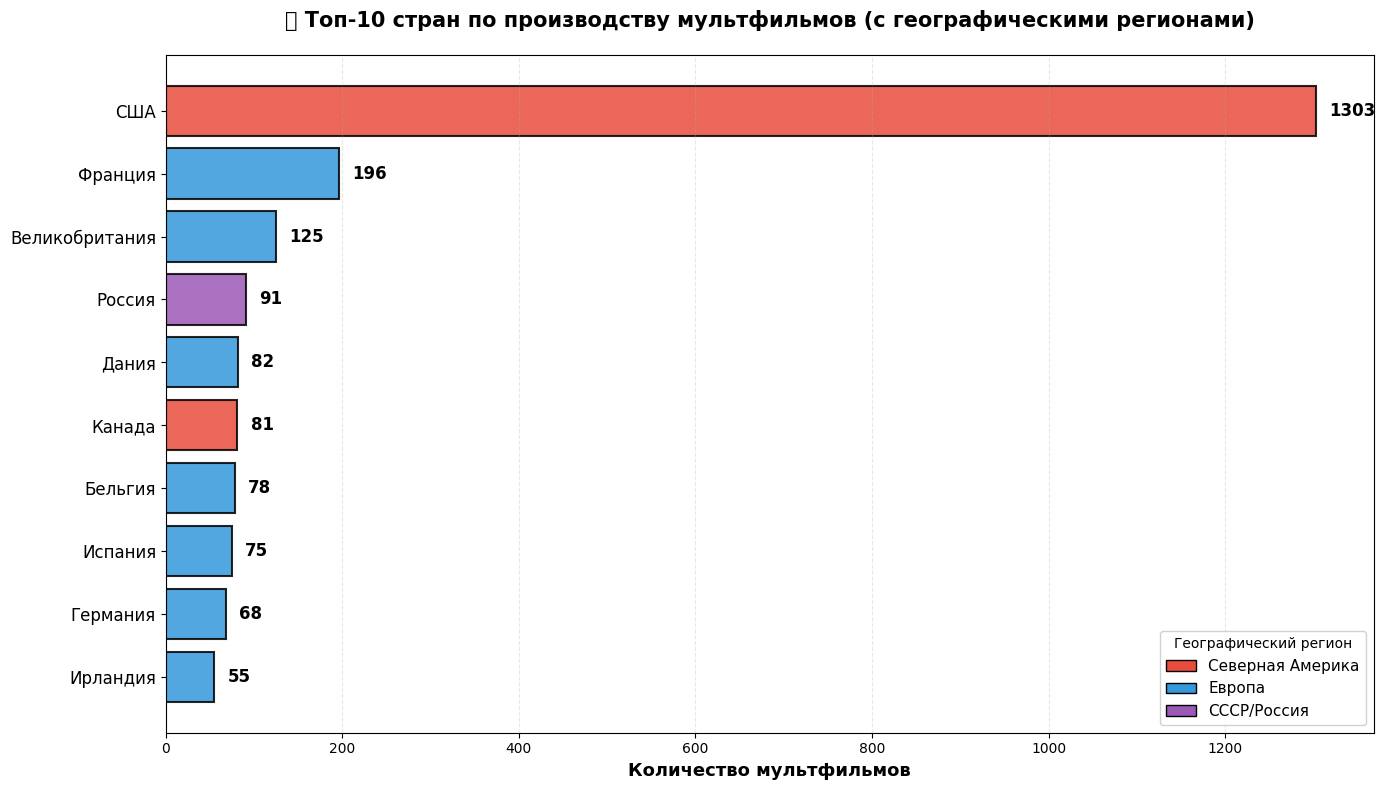


💡 Географический инсайт:
   Северная Америка: 1384 фильмов
   Европа: 679 фильмов
   СССР/Россия: 91 фильмов

🔴 Северная Америка (США + Канада) — безусловный лидер
🔵 Европа представлена широко (Франция, Дания, Великобритания и др.)
🟣 СССР/Россия — сильная позиция благодаря советской анимационной школе


In [14]:
# 📊 Географическая визуализация 3: Топ-10 стран с географическим контекстом
# Горизонтальный bar chart с географическими регионами

import matplotlib.pyplot as plt
import numpy as np

# 1. Подготовка данных
top10 = country_stats_clean.nlargest(10, 'film_count')

# 2. Определяем географические регионы (расширенный список)
region_colors = {
    'Северная Америка': '#e74c3c',
    'Европа': '#3498db',
    'Азия': '#f39c12',
    'СССР/Россия': '#9b59b6',
    'Океания': '#1abc9c',
    'Другие': '#95a5a6'  # Для стран без маппинга
}

regions = {
    'США': 'Северная Америка', 'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка', 'Аргентина': 'Северная Америка',
    'Франция': 'Европа', 'Дания': 'Европа', 'Великобритания': 'Европа',
    'Нидерланды': 'Европа', 'Бельгия': 'Европа', 'Германия': 'Европа',
    'Испания': 'Европа', 'Италия': 'Европа', 'Чехословакия': 'Европа',
    'Швеция': 'Европа', 'Польша': 'Европа', 'Ирландия': 'Европа',
    'Норвегия': 'Европа', 'Финляндия': 'Европа', 'Австрия': 'Европа',
    'Швейцария': 'Европа', 'Венгрия': 'Европа', 'Люксембург': 'Европа',
    'Румыния': 'Европа', 'Португалия': 'Европа', 'Греция': 'Европа',
    'Болгария': 'Европа',
    'СССР': 'СССР/Россия', 'Россия': 'СССР/Россия',
    'Япония': 'Азия', 'Южная Корея': 'Азия', 'Китай': 'Азия',
    'Республика Корея': 'Азия', 'Индия': 'Азия', 'Израиль': 'Азия',
    'Турция': 'Азия',
    'Австралия': 'Океания', 'Новая Зеландия': 'Океания',
    'Бразилия': 'Южная Америка', 'Чили': 'Южная Америка',
    'ЮАР': 'Африка'
}

# 3. Маппинг с обработкой отсутствующих значений
top10['region'] = top10['country'].map(regions).fillna('Другие')  # Заполняем NaN
top10['color'] = top10['region'].map(region_colors)

# 4. Проверка на NaN (на всякий случай)
if top10['color'].isna().any():
    print("⚠️ Предупреждение: есть страны без цвета, заменяем на серый")
    top10['color'] = top10['color'].fillna('#95a5a6')

# 5. Создаём график
fig, ax = plt.subplots(figsize=(14, 8))

y_pos = np.arange(len(top10))
bars = ax.barh(y_pos, top10['film_count'], color=top10['color'].tolist(),
               edgecolor='black', linewidth=1.5, alpha=0.85)

# 6. Добавляем значения на столбцы
for i, (value, country) in enumerate(zip(top10['film_count'], top10['country'])):
    ax.text(value + 15, i, f'{int(value)}',
            va='center', fontsize=12, fontweight='bold')

# 7. Оформление
ax.set_yticks(y_pos)
ax.set_yticklabels(top10['country'], fontsize=12)
ax.set_xlabel('Количество мультфильмов', fontsize=13, fontweight='bold')
ax.set_title('🌍 Топ-10 стран по производству мультфильмов (с географическими регионами)',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# 8. Легенда регионов (только те, что есть в топ-10)
from matplotlib.patches import Patch
unique_regions = top10['region'].unique()
legend_elements = [Patch(facecolor=region_colors[region], edgecolor='black', label=region)
                   for region in unique_regions]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11,
          title='Географический регион', framealpha=0.9)

plt.tight_layout()
plt.show()

# 9. Инсайт
print("\n💡 Географический инсайт:")
region_counts = top10.groupby('region')['film_count'].sum().sort_values(ascending=False)
for region, count in region_counts.items():
    print(f"   {region}: {int(count)} фильмов")

print("\n🔴 Северная Америка (США + Канада) — безусловный лидер")
print("🔵 Европа представлена широко (Франция, Дания, Великобритания и др.)")
print("🟣 СССР/Россия — сильная позиция благодаря советской анимационной школе")

🔥 Визуализация 4: Sunburst Chart (Plotly) — Иерархия: Мир → Регион → Страна

In [15]:
# 🔥 Географическая визуализация 4: Sunburst Chart
# Иерархическая визуализация: Мир → Географический регион → Страна

import plotly.express as px

# 1. Подготовка иерархических данных
df_regions = country_stats_clean.copy()
df_regions['region'] = df_regions['country'].map(regions).fillna('Другие')

# 2. Группировка по регионам
region_totals = df_regions.groupby('region')['film_count'].sum().reset_index()
region_totals['country'] = region_totals['region']
region_totals['parent'] = 'Мир'

# 3. Данные по странам
country_data = df_regions.copy()
country_data['parent'] = country_data['region']

# 4. Добавляем корневой узел
root = pd.DataFrame([{'country': 'Мир', 'parent': '', 'film_count': country_data['film_count'].sum(), 'region': 'Мир'}])

# 5. Объединяем все уровни
sunburst_data = pd.concat([root, region_totals[['country', 'parent', 'film_count', 'region']],
                           country_data[['country', 'parent', 'film_count', 'region']]], ignore_index=True)

# 6. Создаём Sunburst
fig = px.sunburst(
    sunburst_data,
    names='country',
    parents='parent',
    values='film_count',
    color='film_count',
    color_continuous_scale='RdYlGn_r',
    title='🌍 Глобальная структура анимационной индустрии (иерархия: Мир → Регион → Страна)'
)

fig.update_layout(
    height=700,
    font=dict(size=12)
)

fig.show()

# 7. Инсайт
print("\n💡 Инсайт из Sunburst:")
print("📍 Центр = весь мир производства мультфильмов")
print("📍 Первое кольцо = географические регионы (доли очевидны)")
print("📍 Внешнее кольцо = конкретные страны (кликабельно!)")
print("\n🎯 Интерактивность: кликните на сегмент, чтобы \"увеличить\" регион!")


💡 Инсайт из Sunburst:
📍 Центр = весь мир производства мультфильмов
📍 Первое кольцо = географические регионы (доли очевидны)
📍 Внешнее кольцо = конкретные страны (кликабельно!)

🎯 Интерактивность: кликните на сегмент, чтобы "увеличить" регион!


Инсайт: Sunburst идеально показывает пропорции: ~40% Северная Америка, ~35% Европа, остальное — СССР/Азия.

# 💎 Визуализация 5: Treemap (Plotly) — Площадь = количество фильмов

In [16]:
# 💎 Географическая визуализация 5: Treemap
# Прямоугольники, площадь которых пропорциональна количеству фильмов

import plotly.express as px

# 1. Подготовка данных
treemap_data = country_stats_clean.copy()
treemap_data['region'] = treemap_data['country'].map(regions).fillna('Другие')

# 2. Топ-15 стран для читаемости
top15_treemap = treemap_data.nlargest(15, 'film_count')

# 3. Создаём Treemap
fig = px.treemap(
    top15_treemap,
    path=[px.Constant("Мировая анимация"), 'region', 'country'],
    values='film_count',
    color='film_count',
    color_continuous_scale='Plasma',
    title='🗺️ Treemap: Площадь прямоугольника = количество мультфильмов (Топ-15 стран)',
    hover_data={'film_count': ':,'}
)

fig.update_traces(textinfo="label+value")
fig.update_layout(
    height=650,
    font=dict(size=14)
)

fig.show()

# 4. Инсайт
usa_share = (top15_treemap[top15_treemap['country'] == 'США']['film_count'].values[0] /
             top15_treemap['film_count'].sum() * 100)
print(f"\n💡 Визуальный инсайт: США занимают ~{usa_share:.0f}% площади Treemap!")
print("📦 Самые крупные прямоугольники = США, Франция, СССР/Россия")
print("📦 Европейский кластер виден как группа средних прямоугольников")


💡 Визуальный инсайт: США занимают ~55% площади Treemap!
📦 Самые крупные прямоугольники = США, Франция, СССР/Россия
📦 Европейский кластер виден как группа средних прямоугольников


Инсайт: Treemap мгновенно показывает доминирование США — их прямоугольник огромен!

# 🎯 Итоговый географический инсайт:

In [17]:
# 🎯 Общий географический анализ

print("="*70)
print("🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОЙ АНИМАЦИОННОЙ ИНДУСТРИИ")
print("="*70)

# 1. Анализ по регионам
region_stats = df_regions.groupby('region')['film_count'].sum().sort_values(ascending=False)
total = region_stats.sum()

print("\n📊 Распределение по регионам:")
for region, count in region_stats.items():
    share = count / total * 100
    print(f"   {region:20s}: {int(count):4d} фильмов ({share:5.1f}%)")

# 2. Концентрация производства
top5_share = country_stats_clean.nlargest(5, 'film_count')['film_count'].sum() / total * 100
top10_share = country_stats_clean.nlargest(10, 'film_count')['film_count'].sum() / total * 100

print(f"\n🎯 Концентрация производства:")
print(f"   Топ-5 стран контролируют:  {top5_share:.1f}% мирового производства")
print(f"   Топ-10 стран контролируют: {top10_share:.1f}% мирового производства")

# 3. Кластеры
print(f"\n🌐 Географические кластеры:")
print(f"   🔴 Северо-Американский: США + Канада (доминанты)")
print(f"   🔵 Западно-Европейский: Франция, Дания, Великобритания (сильные)")
print(f"   🟣 Восточно-Европейский: СССР/Россия (историческое наследие)")
print(f"   🟠 Азиатский: Япония, Ю. Корея (растущий)")

print("\n" + "="*70)

🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОЙ АНИМАЦИОННОЙ ИНДУСТРИИ

📊 Распределение по регионам:
   Северная Америка    : 1414 фильмов ( 55.4%)
   Европа              :  863 фильмов ( 33.8%)
   Азия                :  118 фильмов (  4.6%)
   СССР/Россия         :   91 фильмов (  3.6%)
   Океания             :   63 фильмов (  2.5%)
   Африка              :    2 фильмов (  0.1%)

🎯 Концентрация производства:
   Топ-5 стран контролируют:  70.4% мирового производства
   Топ-10 стран контролируют: 84.4% мирового производства

🌐 Географические кластеры:
   🔴 Северо-Американский: США + Канада (доминанты)
   🔵 Западно-Европейский: Франция, Дания, Великобритания (сильные)
   🟣 Восточно-Европейский: СССР/Россия (историческое наследие)
   🟠 Азиатский: Япония, Ю. Корея (растущий)

